In [2]:
!pip install quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import quandl

In [3]:
import quandl
quandl.ApiConfig.api_key = '4PNpMrXyjmrx-y-iwdpi'

In [56]:
data = quandl.get('BSE/BOM512599', start_date='2023-01-01', end_date='2023-11-22')
data.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2023-01-02,3874.7,3874.70,3821.0,3840.70,3848.18,37446.0,4337.0,144098785.0,7585.0,20.26,53.70,-34.00
2023-01-03,3836.0,3852.85,3791.0,3830.35,3832.53,18280.0,1909.0,70058671.0,3507.0,19.18,61.85,-5.65
2023-01-04,3833.1,3874.50,3805.0,3827.55,3832.61,26349.0,2921.0,100985544.0,3243.0,12.31,69.50,-5.55
2023-01-05,3834.9,3842.00,3759.0,3829.10,3810.67,35948.0,4683.0,136985880.0,7541.0,20.98,83.00,-5.80
2023-01-06,3829.1,3868.00,3799.6,3824.35,3833.61,33126.0,3730.0,126992117.0,3408.0,10.29,68.40,-4.75


In [57]:
data.describe()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
count,166.000000,166.000000,166.000000,166.000000,166.000000,1.660000e+02,166.000000,1.660000e+02,1.660000e+02,166.000000,166.000000,166.000000
mean,2320.541566,2371.854819,2249.335843,2304.334337,2309.981506,6.661316e+05,27546.283133,1.215509e+09,3.300755e+05,23.472711,122.518976,-16.207229
std,601.095515,589.279095,603.521452,589.912710,593.378645,3.190998e+06,32676.603533,4.566765e+09,3.023927e+06,9.940829,138.395958,126.464040
min,1138.000000,1313.000000,1017.100000,1194.200000,1222.910000,1.828000e+04,1909.000000,7.005867e+07,3.243000e+03,7.670000,25.150000,-901.300000
25%,1852.312500,1905.000000,1802.875000,1847.512500,1855.280000,1.260285e+05,7980.750000,3.210700e+08,2.789400e+04,17.310000,55.362500,-34.450000
50%,2396.000000,2430.000000,2363.975000,2392.375000,2397.790000,2.577290e+05,13879.500000,5.062744e+08,5.905150e+04,21.470000,76.300000,-5.900000
75%,2496.750000,2547.350000,2459.900000,2493.750000,2505.965000,4.727620e+05,27604.250000,8.844316e+08,1.072390e+05,28.432500,127.500000,20.287500
max,3874.700000,3879.000000,3821.000000,3854.200000,3852.140000,4.101792e+07,166681.000000,5.819210e+10,3.902786e+07,95.150000,1088.000000,308.550000


In [58]:
data.shape

(166, 12)

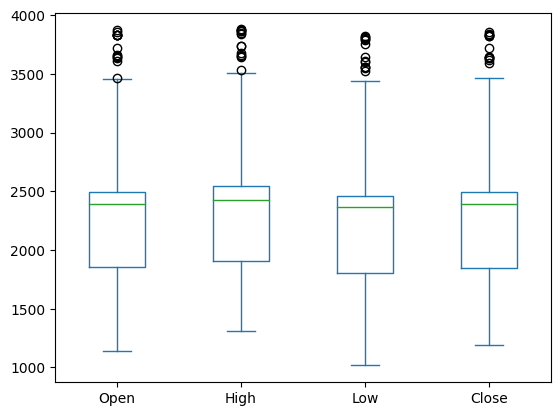

In [59]:
data[['Open', 'High', 'Low', 'Close']].plot(kind='box')
plt.show()

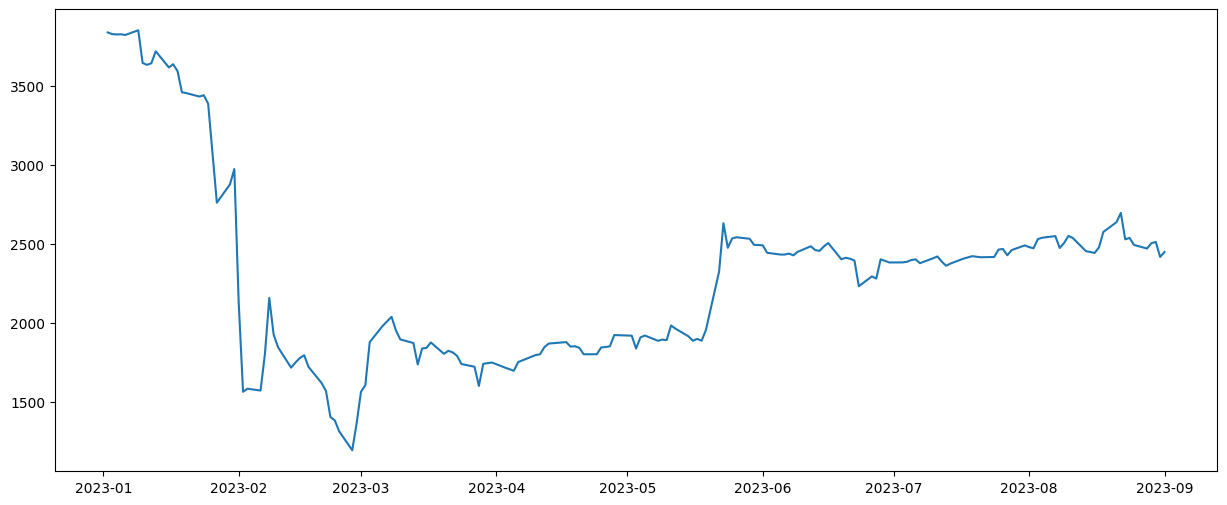

In [60]:
plt.figure(figsize=(15, 6))
plt.plot(data['Close'])
plt.show()

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

new_data = data[['Open', 'High', 'Low', 'Close']]
new_data.head()

,Open,High,Low,Close
Date,,,,
2023-01-02,3874.7,3874.70,3821.0,3840.70
2023-01-03,3836.0,3852.85,3791.0,3830.35
2023-01-04,3833.1,3874.50,3805.0,3827.55
2023-01-05,3834.9,3842.00,3759.0,3829.10
2023-01-06,3829.1,3868.00,3799.6,3824.35


In [62]:
x = new_data.drop('Close', axis=1)
y = new_data['Close']

In [63]:
# splitting into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [64]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

In [66]:
x_test

array([[ 0.2693566 ,  0.3448656 ,  0.29712158],
       [ 0.14230368,  0.14773864,  0.25200732],
       [-0.76747851, -0.72790749, -0.64104068],
       [-0.87586923, -0.91454716, -0.77069265],
       [ 0.40549068,  0.39090736,  0.47221771],
       [-0.78864011, -0.76695773, -0.96426336],
       [ 0.24977796,  0.23231907,  0.29580197],
       [-0.59260371, -0.69192671, -0.56722484],
       [ 0.2519441 ,  0.28006608,  0.32631802],
       [ 0.23553137,  0.2288233 ,  0.30710115],
       [ 0.75049142,  1.13840392,  0.69077859],
       [-1.36575195, -1.23590162, -1.38414767],
       [ 1.88971869,  1.85733754,  1.92461661],
       [-0.85070859, -0.87362115, -0.74281583],
       [-1.20420729, -1.29234541, -1.34208501],
       [-0.89419818, -0.93066178, -0.81968327],
       [ 0.09639801,  0.02342588,  0.15303635],
       [-0.76756183, -0.84531399, -0.74726952],
       [ 0.2905182 ,  0.28125976,  0.3918038 ],
       [ 1.86530786,  1.93697273,  1.94944183],
       [-0.78089197, -0.84736029, -0.693

In [67]:
r2_score(y_test, y_pred)

0.9960943436756096

In [68]:
# get the r2_score for training set
r2_score(y_train, regressor.predict(x_train))

0.9959186867679792

In [69]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [70]:
prediction.head()

,Actual,Predicted
Date,,
2023-05-31,2494.25,2513.109917
2023-07-21,2416.65,2440.207253
2023-04-28,1923.90,1926.224909
2023-03-23,1792.60,1812.812012
2023-05-26,2543.35,2566.250827


In [71]:
mean = scaler.mean_
std = np.sqrt(scaler.var_)

In [74]:
input_data = np.array([[2381.00, 2465.60, 2378.70]])
scaled_user_input = input_data.reshape(1, -1)

scaled_user_input = (input_data - mean) / std
# Assuming model is your trained machine learning model
prediction = regressor.predict(scaled_user_input)


In [75]:
prediction[0]

2446.6044958831994